# Air BnB listings

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [10]:
lst = pd.read_csv('/Users/Ramv/Downloads/listings.csv')

In [11]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Visualising Missing Values Proportions

<Axes: title={'center': 'Missing values per column, %'}>

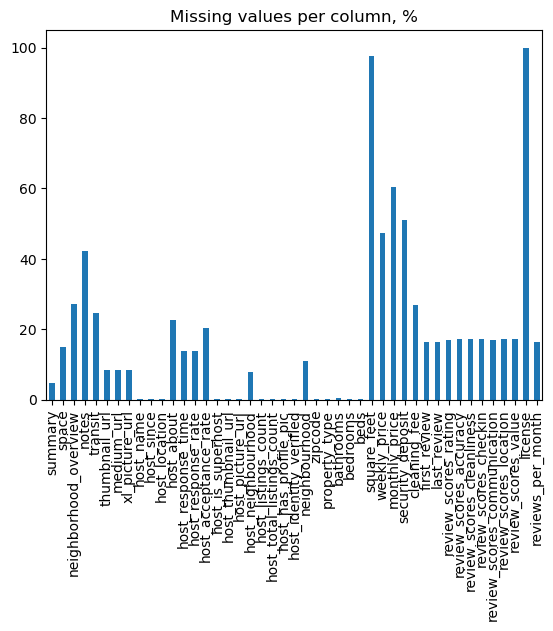

In [21]:
#find % of each column
listings_missing_df = lst.isnull().mean() * 100

#filter out columns which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0] 


#plot results
listings_columns_with_nan.plot.bar(title = 'Missing values per column, %',x = 'Columns', y='Missing values')

In [23]:
#Non informative Columns
df = lst.drop(['listing_url','scrape_id', 'name', 'summary', 'space', 'description', 
               'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 
               'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',  
               'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'street',
               'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'calendar_updated',
               'calendar_last_scraped',  'license', 'jurisdiction_names',
               'weekly_price','monthly_price','transit','id'], axis= 1)

In [24]:
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-01-04,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,2016-01-04,2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,2016-01-04,2014-06-12,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,2016-01-04,2013-11-06,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,2016-01-04,2011-11-29,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


#Delete Symbols and convert to numeric type

In [25]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_acceptance_rate'] =df['host_acceptance_rate'].str.replace('%','')

In [26]:
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])

In [27]:
df['price'] =df['price'].str.replace('$','')
df['security_deposit'] =df['security_deposit'].str.replace('$','')
df['cleaning_fee'] =df['cleaning_fee'].str.replace('$','')
df['extra_people'] =df['extra_people'].str.replace('$','')

In [28]:
df['price'] =df['price'].str.replace(',','')
df['security_deposit'] =df['security_deposit'].str.replace(',','')
df['cleaning_fee'] =df['cleaning_fee'].str.replace(',','')
df['extra_people'] =df['extra_people'].str.replace(',','')

In [29]:
df['security_deposit'] = pd.to_numeric(df['security_deposit'])
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'])
df['price'] = pd.to_numeric(df['price'])
df['extra_people'] = pd.to_numeric(df['extra_people'])

#Check outliers and errors

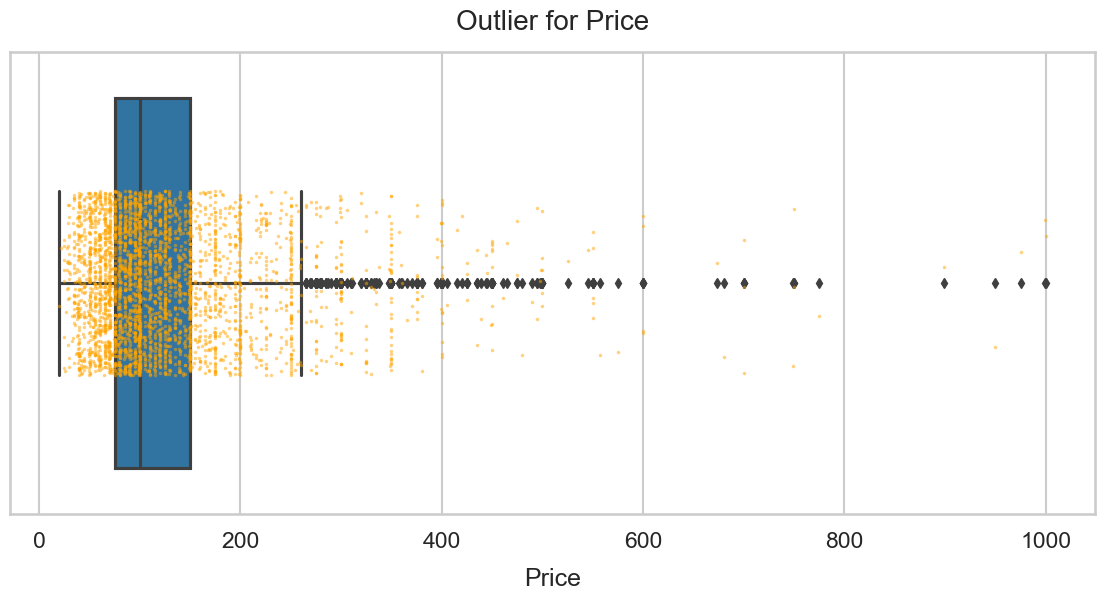

In [30]:
sns.set_context("talk")
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
sns.boxplot(x='price', data=df, orient='h')
sns.stripplot(x='price', data=df, color="orange", alpha=0.5, jitter=0.2, size=2.5)
plt.title("Outlier for Price", fontsize=20, y=1.03)
plt.xlabel("Price", fontsize=18, labelpad=12);
#plt.show()
#plt.savefig("image1.png");

In [31]:
df = df[df.price<800]

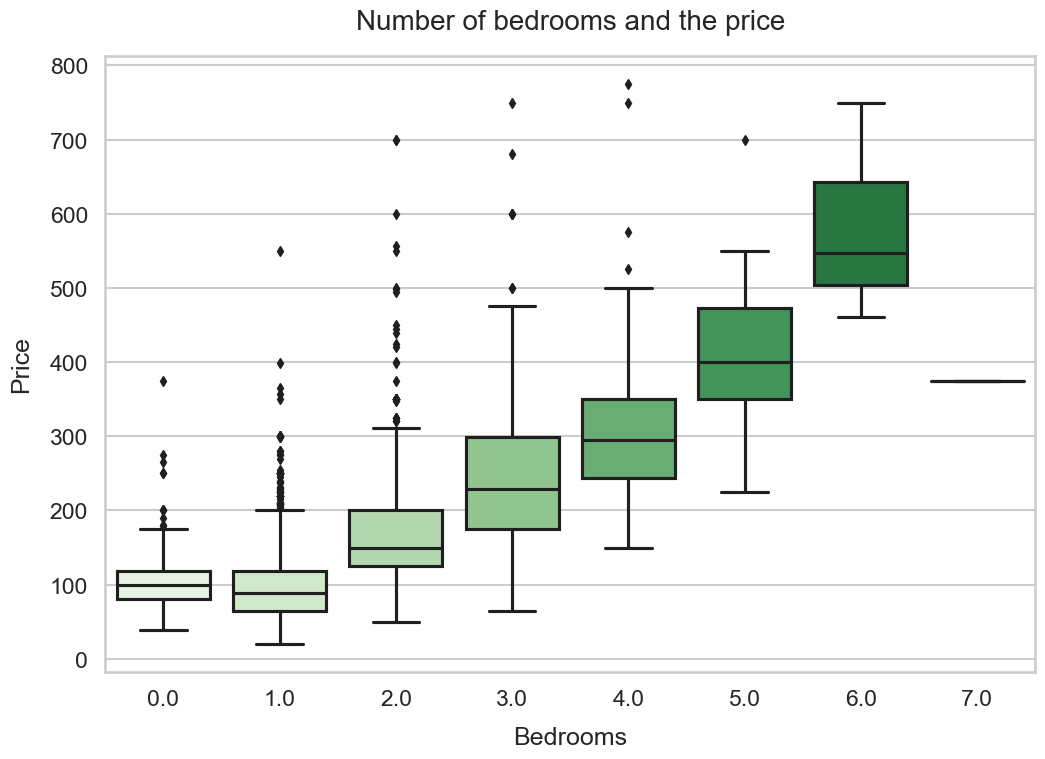

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bedrooms", y="price", palette="Greens", data=df)
plt.title("Number of bedrooms and the price", fontsize=20, y=1.03)
plt.xlabel("Bedrooms", fontsize=18, labelpad=12)
plt.ylabel("Price", fontsize=18, labelpad=12);
#plt.savefig("image2.png");

In [35]:
# Delete one outlier.The dataset only has one data point for seven bedrooms.
df = df[df.bedrooms<7]

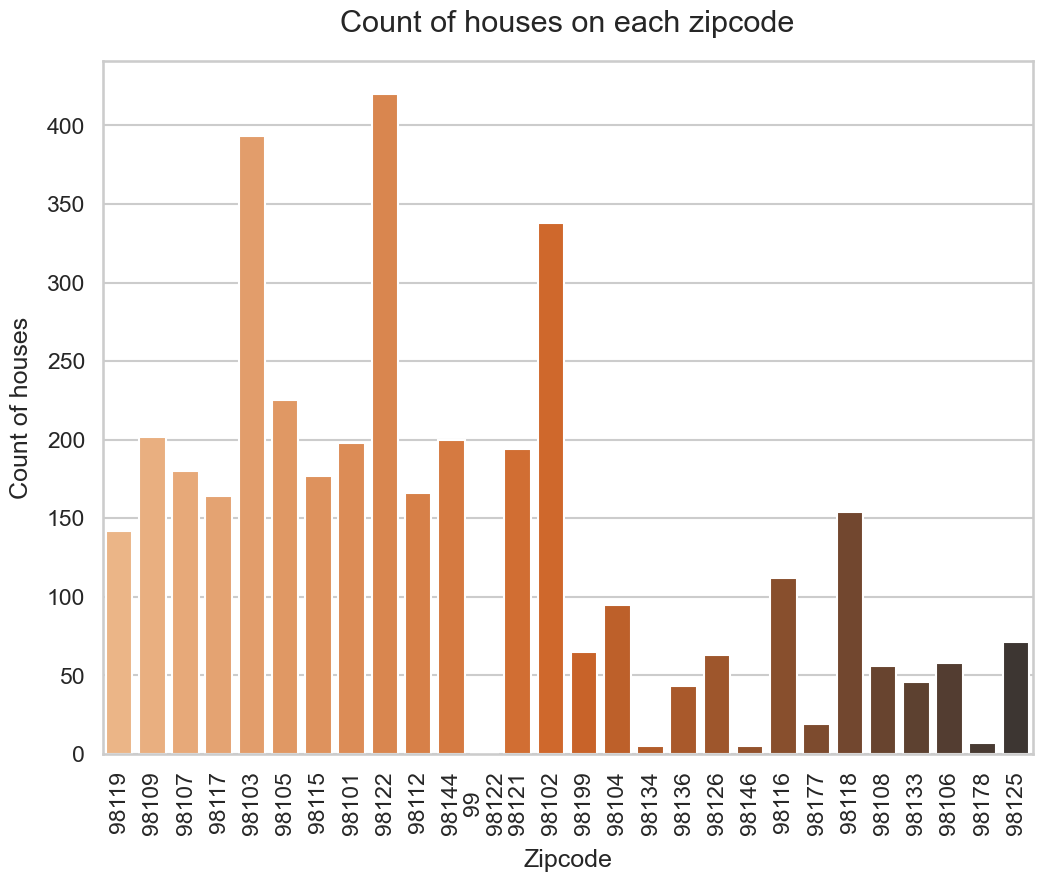

In [34]:
plt.figure(figsize=(12,9))
sns.countplot(x="zipcode", palette="Oranges_d", data=df)
plt.title("Count of houses on each zipcode", fontsize=22, y=1.03)
plt.xlabel("Zipcode", labelpad=10)
plt.ylabel("Count of houses", labelpad=10)
plt.xticks(rotation=90);
#plt.savefig("image3.png");

One zipcode seems like an error

In [36]:
df = df.drop(df[(df['zipcode']== '99\n98122')].index)

### Create new variables: host_period, review_period

In [37]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])

In [38]:
df['host_period'] = df['last_scraped']- df['host_since']
df['host_period'] = df['host_period'].dt.days

In [39]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['first_review'] = pd.to_datetime(df['first_review'])

In [40]:
df['review_period'] = df['last_review']- df['first_review']
df['review_period'] = df['review_period'].dt.days

In [41]:
df = df.drop(['last_scraped','host_since','last_review','first_review'], axis = 1)

# Plot data with cleaned data(spatial mapping)

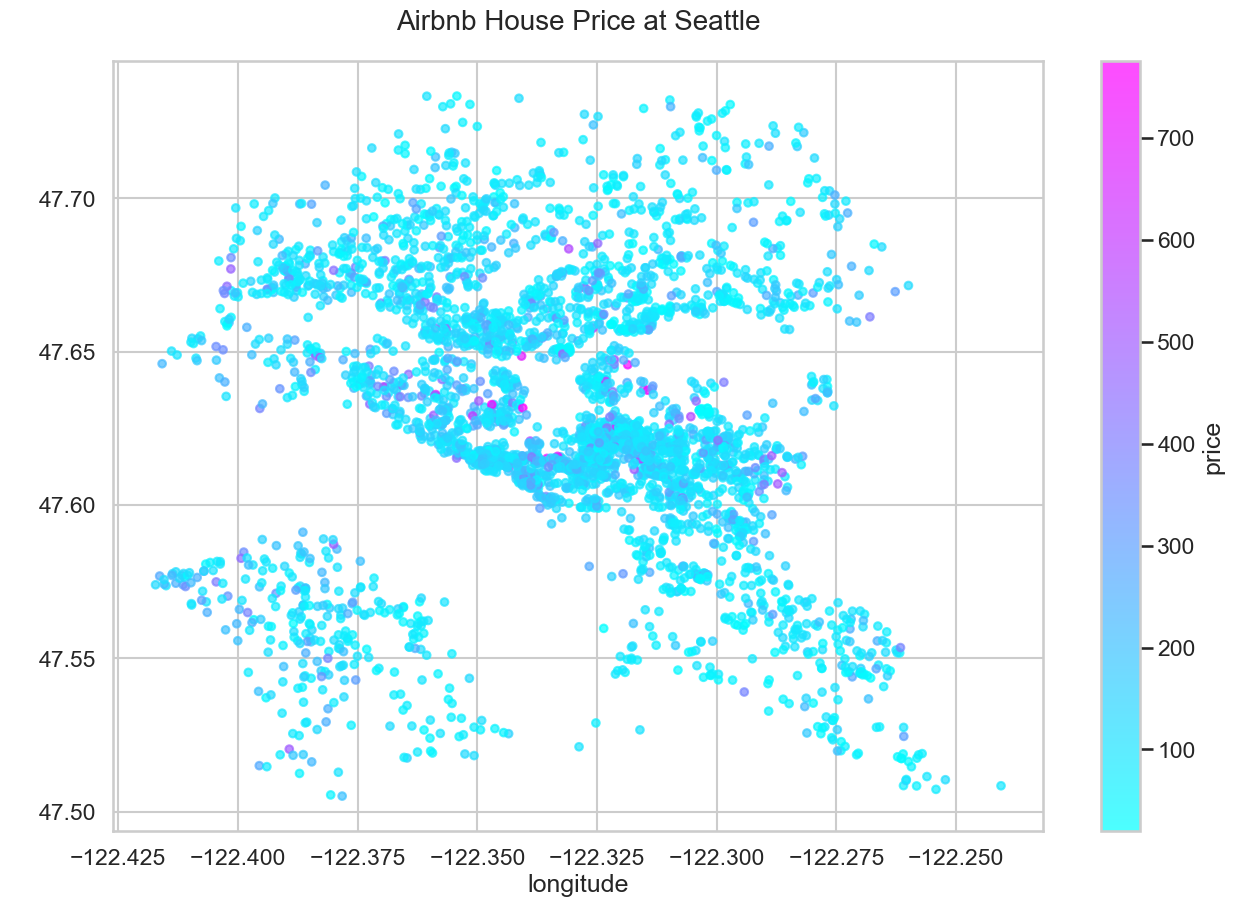

In [47]:
df.plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap="cool", s= 30,
    colorbar=True, alpha=0.7, figsize=(15,10),
)
plt.title('Airbnb House Price at Seattle', fontsize=20, y=1.03)
plt.ylabel(" ");
#plt.savefig("image4.png");

# Plot property type and price

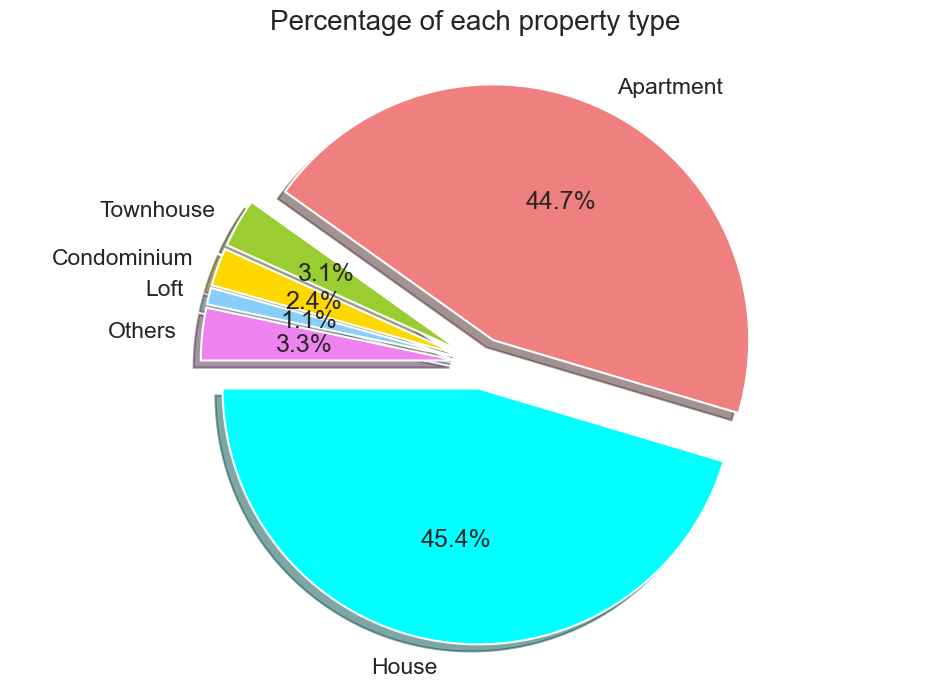

In [43]:
labels = 'House', 'Apartment', 'Townhouse', 'Condominium', "Loft", "Others"
sizes = [1727, 1702, 118, 91, 40, 126]
colors = ['cyan','lightcoral', 'yellowgreen', 'gold', 'lightskyblue', "violet"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.figure(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of each property type", fontsize=20, y=1.03)
plt.axis('equal');
#plt.savefig("image5.png");

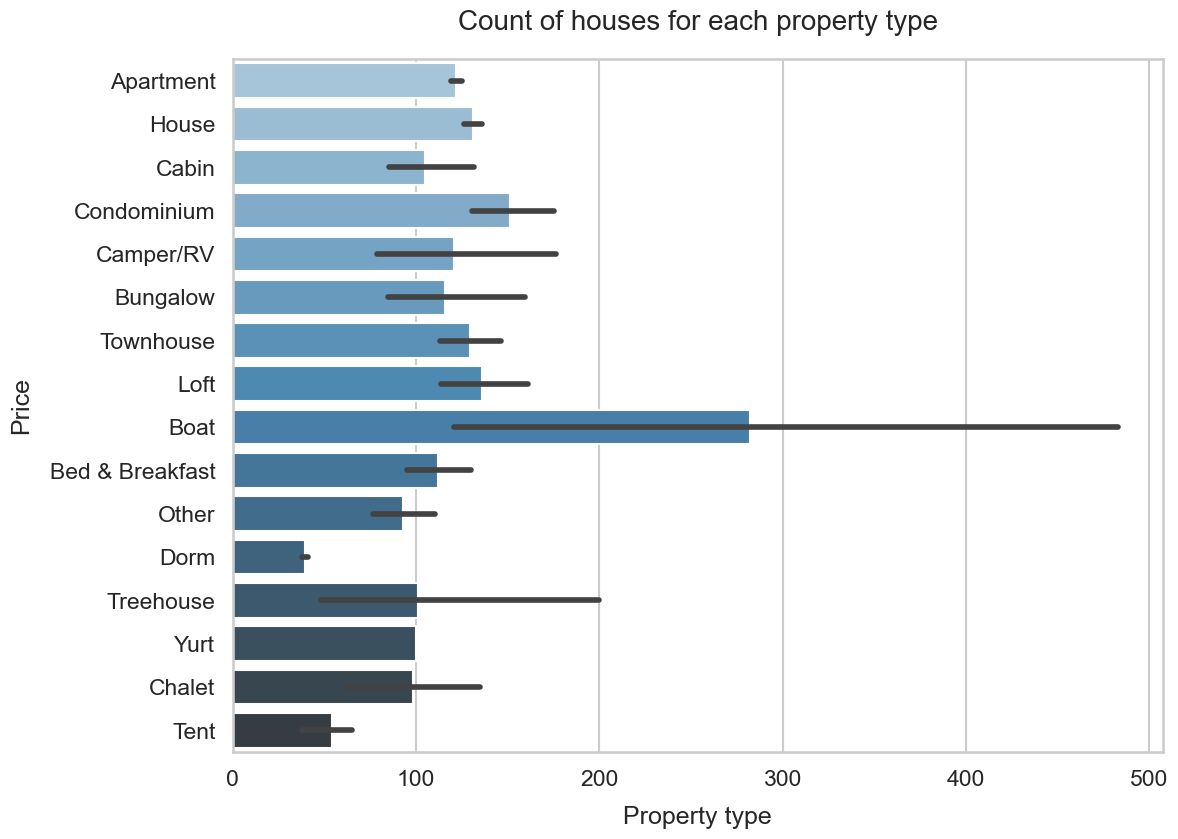

In [48]:
plt.figure(figsize=(12,9))
sns.barplot(x="price", y="property_type", palette="Blues_d", data=df)
plt.title("Count of houses for each property type", fontsize=20, y=1.03)
plt.xlabel("Property type", fontsize=18, labelpad=12)
plt.ylabel("Price", fontsize=18, labelpad=12);
#plt.savefig("image6.png");

Property type Boat owns the biggest price variance. The highest price is much higher than others

Plot room type and price

In [49]:
roomtype_and_price = df.groupby("room_type").agg({"price": "mean"}).reset_index()

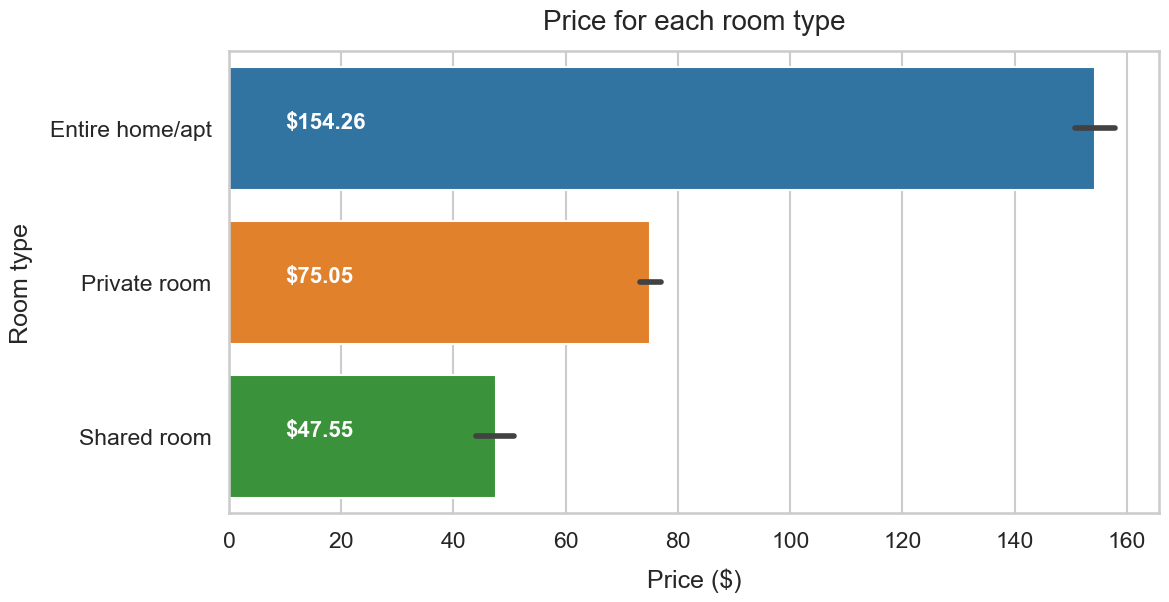

In [50]:
sns.set_context("talk")
plt.figure(figsize=(12,6))
ax= sns.barplot(x='price', y="room_type", data=df, orient='h')
plt.title("Price for each room type", fontsize=20, y=1.03)
plt.xlabel("Price ($)", fontsize=18, labelpad=12)
for index, row in roomtype_and_price.iterrows():
    ax.text(10, index, '$'+ str(round(row["price"],2)), color="white", weight="bold", fontsize=16)
plt.ylabel("Room type", fontsize=18, labelpad=12);
#plt.savefig("image7.png");

## Plot number_of_reviews and price

In [53]:
df['number_of_reviews_bins'] = pd.cut(df['number_of_reviews'], bins = [0,2,9,26,474])

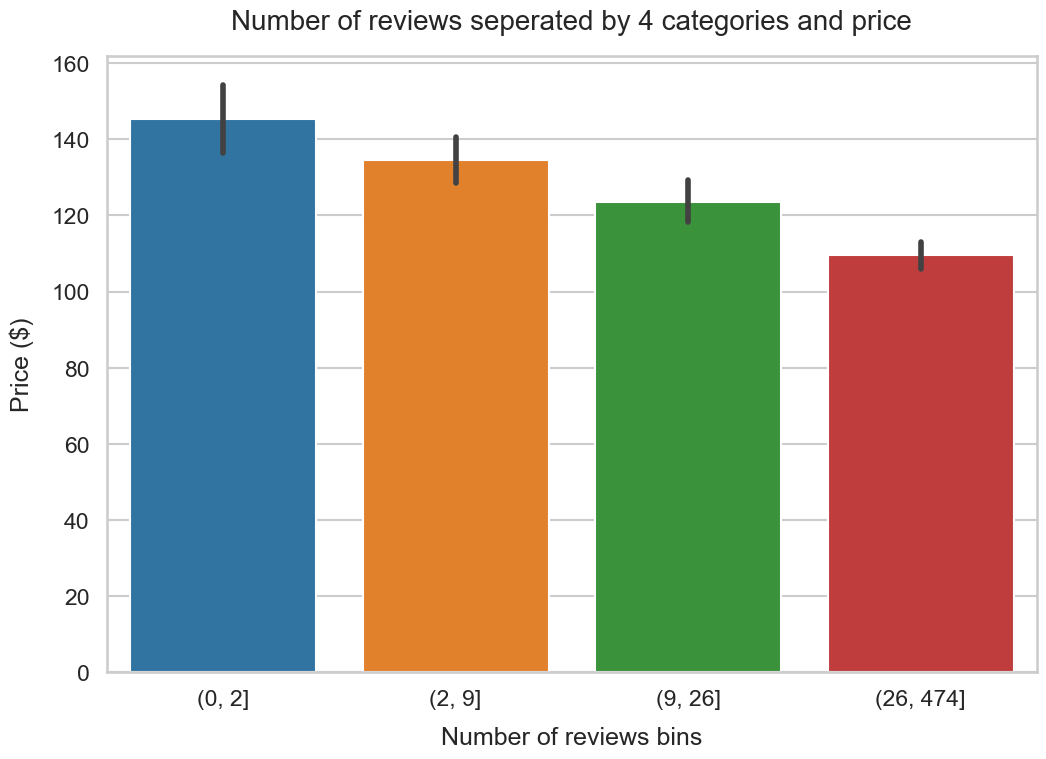

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x="number_of_reviews_bins", y="price", data=df)
plt.title("Number of reviews seperated by 4 categories and price", fontsize=20, y=1.03)
plt.xlabel("Number of reviews bins", fontsize=18, labelpad=12)
plt.ylabel("Price ($)", fontsize=18, labelpad=12);
#plt.savefig("image8.png");

# Plot cancellation policy and price

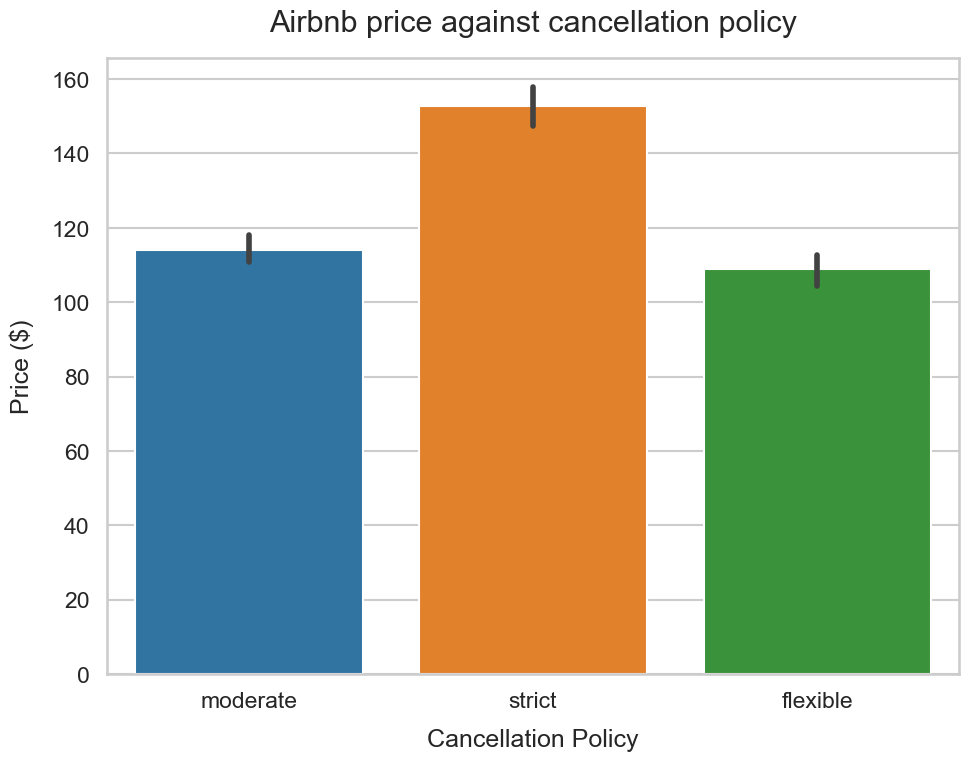

In [55]:
plt.figure(figsize=(11,8))
sns.barplot(x='cancellation_policy', y = 'price', data = df)
plt.title("Airbnb price against cancellation policy", fontsize=22, y=1.03)
plt.ylabel("Price ($)", labelpad=12)
plt.xlabel("Cancellation Policy", labelpad=12);
#plt.savefig("image12.png");